<a href="https://colab.research.google.com/github/osemuaimiosior/purchase_intent/blob/master/Online_purchase_intent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.decomposition import PCA
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering

import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls

data  drive  sample_data


In [12]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/online_shoppers_intention.csv')
data.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
df = data.copy()

In [14]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.head()

In [15]:
month = pd.get_dummies(df.Month)

In [16]:
Visitor = pd.get_dummies(df.VisitorType)

In [17]:
Weekend = pd.get_dummies(df.Weekend)

In [18]:
Weekend.columns.values

array([False, True], dtype=object)

In [20]:
columns = ['weekend_false','weekend_true']

In [21]:
Weekend.columns = columns

In [22]:
Revenue = pd.get_dummies(df.Revenue)

In [23]:
Revenue.columns.values

array([False, True], dtype=object)

In [24]:
columns1 = ['Revenue_false','Revenue_true']

In [25]:
Revenue.columns = columns1

In [26]:
df = pd.concat([df,month, Visitor,Weekend,Revenue], axis=1)

In [27]:
df = df.drop(['Month', 'Revenue','VisitorType','Weekend'],axis=1)

In [28]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [29]:
df_corr = df.corr()

plt.figure(figsize = (25,15))
s = sns.heatmap(df_corr,
               annot = True,
               cmap = 'RdYlGn',
               vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

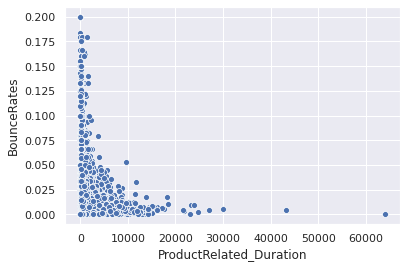

In [30]:
s = sns.scatterplot(data=df , x='ProductRelated_Duration', y='BounceRates')

In [31]:
scaler = StandardScaler()

In [32]:
df_std = scaler.fit_transform(df)

In [33]:
df_std.shape

(12330, 31)

In [34]:
pca = PCA(.80)

In [35]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.n_components_

16

In [37]:
pca_explained_variance = pca.explained_variance_ratio_

In [38]:
pca = PCA(n_components = 16)

In [39]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca_components = pca.components_

In [41]:
pca_transformed = pca.transform(df_std)

In [42]:
df_pca= pd.DataFrame(data = pca_components, 
                     columns = df.columns.values,
                     index = ['Components_1', 'Components_2', 'Components 3','Components 4', 'Components 5', 'Components 6',
                                  'Components 7', 'Components 8', 'Components 9','Components 10', 'Components 11','Components 12',
                                  'Components 13', 'Components 14', 'Components 15','Components 16'])
df_pca.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true
Components_1,0.332821,0.277807,0.286401,0.238964,0.354465,0.352173,-0.270713,-0.320235,0.180489,-0.105620,-0.014502,-0.010866,-0.015807,-0.040863,0.023480,-0.003814,-0.065128,0.004032,-0.016080,-0.051191,-0.103239,0.130369,0.043377,0.033165,0.059373,-0.018092,-0.053909,-0.059605,0.059605,-0.273161,0.273161
Components_2,0.121508,0.125346,0.219459,0.204261,0.249956,0.259153,0.134555,0.141822,-0.244304,0.124241,-0.043318,-0.079767,-0.062876,-0.032512,-0.006592,-0.087684,0.042528,0.010775,0.027513,-0.009953,0.115738,-0.018934,-0.053107,-0.045556,-0.443710,-0.119223,0.462795,0.090327,-0.090327,0.276280,-0.276280
Components 3,-0.021981,-0.016983,-0.029044,-0.022450,0.025499,0.030998,0.081897,0.079285,0.174705,0.038067,0.117352,0.159186,0.042828,0.103015,-0.004051,0.037624,0.012736,-0.012607,0.024094,-0.103549,0.050870,0.013397,-0.028364,-0.001553,-0.091679,0.163863,0.051235,0.612327,-0.612327,-0.218343,0.218343
Components 4,0.151623,0.151782,0.077322,0.072162,0.016490,0.026394,-0.198492,-0.194247,-0.263304,-0.123757,0.081040,0.083822,0.079796,-0.014792,0.036335,0.193830,-0.043421,0.010040,0.016820,0.055228,-0.126985,-0.140327,0.049070,0.072620,0.297668,0.133912,-0.323171,0.229426,-0.229426,0.421843,-0.421843
Components 5,0.020688,0.038015,0.079375,0.085222,0.067277,0.080048,0.160250,0.148083,0.011221,0.029882,0.454177,0.379435,0.185767,0.346026,-0.037122,0.158112,-0.047871,-0.009603,0.000009,-0.134992,0.011856,0.049386,-0.045796,-0.046396,-0.109283,0.495114,-0.009521,-0.232218,0.232218,0.028950,-0.028950


plt.figure(figsize=(25,15))
sns.heatmap(df_pca,
           vmin = -1,
           vmax = 1,
           cmap = 'RdYlGn',
           annot = True)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          ['Components 1', 'Components 2', 'Components 3'],
          rotation = 45,
          fontsize = 9)

In [43]:
# important featuers: Bounce rate, exit rate, special day, aug, dec, feb, jul, 
# jun,may, nov(-ve),oct,sep(-ve),other,weekend(true & false)

In [44]:
scores_pca = pca.transform(df_std)

In [45]:
cluster = linkage(scores_pca, method = 'ward')

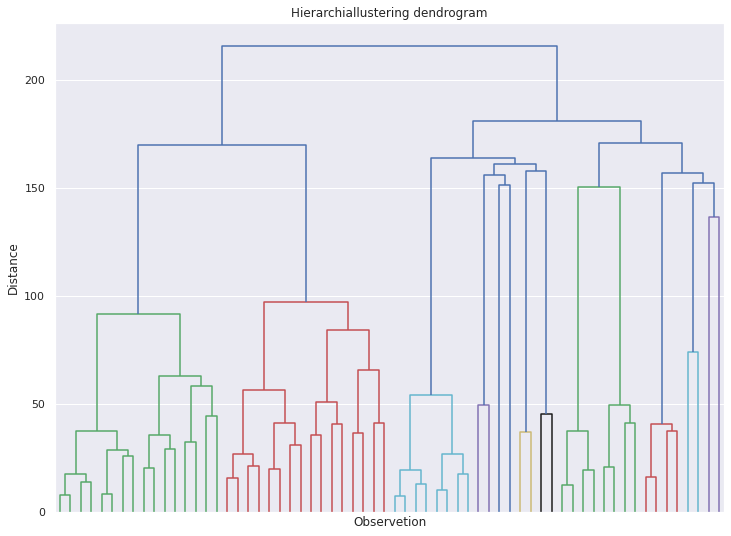

In [53]:
plt.figure(figsize=(12,9))
plt.title('Hierarchiallustering dendrogram')
plt.xlabel('Observetion')
plt.ylabel('Distance')
dendrogram(cluster,show_leaf_counts = False,
           truncate_mode = 'level', 
           p = 5,
           no_labels = True)
plt.show()

In [57]:
K_means = KMeans (n_clusters = 11,init = 'k-means++', random_state = 42 )

In [58]:
K_means.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [67]:
kmeans_df = pd.concat([df.reset_index(drop =True), pd.DataFrame(scores_pca)],axis = 1)
kmeans_df.columns.values[-16: ] = ['Components_1', 'Components_2', 'Components 3','Components 4', 'Components 5', 'Components 6',
                                  'Components 7', 'Components 8', 'Components 9','Components 10', 'Components 11','Components 12',
                                  'Components 13', 'Components 14', 'Components 15','Components 16']
kmeans_df['Segment K-means PCA'] = K_means.labels_

In [70]:
kmeans_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true,Components_1,Components_2,Components 3,Components 4,Components 5,Components 6,Components 7,Components 8,Components 9,Components 10,Components 11,Components 12,Components 13,Components 14,Components 15,Components 16,Segment K-means PCA
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,-3.854272,1.627672,0.735983,-1.693505,-1.052508,-1.825327,3.303912,0.428636,1.633603,-0.711055,-0.166758,-3.702012,-2.723790,-3.745807,3.976081,-0.957750,3
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,-2.091270,0.693026,0.483695,-0.339700,-1.208739,-0.518415,0.033347,-0.034471,1.705975,-0.255583,-0.126238,-3.547293,-2.826560,-3.792038,4.486702,-0.019088,3
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,-3.974976,1.259457,1.316171,-1.168247,1.233439,-1.678207,2.565841,0.609594,0.931231,-1.059068,-0.733907,-3.343231,-2.701284,-3.809211,3.831820,-0.476527,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,-2.688119,0.850343,0.830215,-0.590320,-0.176477,-0.830175,0.751804,0.070073,1.340335,-0.388093,-0.171858,-3.556611,-2.813134,-3.790825,4.367084,-0.171682,3
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,-1.466360,0.186149,-2.176372,-1.166642,0.731236,-0.209793,-0.493631,-0.028841,1.598553,-0.351171,-0.262183,-3.693501,-2.867809,-3.727130,4.718690,-0.130222,3


In [72]:
kmeans_df_freq = kmeans_df.groupby(['Segment K-means PCA']).mean()
kmeans_df_freq

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,weekend_false,weekend_true,Revenue_false,Revenue_true,Components_1,Components_2,Components 3,Components 4,Components 5,Components 6,Components 7,Components 8,Components 9,Components 10,Components 11,Components 12,Components 13,Components 14,Components 15,Components 16
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.962085,101.354661,0.457346,27.835592,34.203791,1091.371271,0.017977,0.037711,5.678176,0.000000,2.068720,2.369668,3.253555,3.483412,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170616,0.000000,0.829384,0.784360,0.215640,0.827014,0.172986,0.335393,-0.172925,-0.035555,0.361440,-0.387571,-0.401355,-0.042879,0.442942,-0.286163,-1.827521,-1.463883,-1.833629,3.975597,-1.227481,-0.003916,1.163042
1,0.031526,1.005086,0.011349,0.000000,2.467844,40.446423,0.180737,0.188353,0.000000,0.099117,2.126103,2.229508,3.093317,5.088272,0.001261,0.131148,0.0,0.041614,0.000000,0.176545,0.401009,0.225725,0.011349,0.011349,0.032787,0.001261,0.965952,0.848676,0.151324,0.996217,0.003783,-3.226282,0.964002,0.566966,-1.242641,0.795935,-1.051459,2.484982,0.301033,-0.270848,-0.094320,0.012118,0.050327,0.057408,0.005717,-0.617541,-0.616537
2,1.857499,57.568552,0.295877,12.508324,28.088129,1027.163342,0.012588,0.037261,2.166145,0.097417,2.123924,2.354554,3.163570,4.241957,0.000000,0.179429,0.0,0.045537,0.000000,0.000000,0.420707,0.258496,0.051880,0.043951,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-0.534331,0.615620,0.550295,0.327532,-0.219663,0.350322,-0.472406,-0.371261,0.221976,-0.164836,0.136519,0.190412,-0.160214,0.023267,-0.321545,0.160521
3,0.543478,16.872418,0.086957,2.385870,11.184783,471.014647,0.047021,0.074148,0.890363,0.233696,1.918478,2.179348,2.663043,2.771739,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005435,0.000000,0.994565,0.847826,0.152174,0.983696,0.016304,-1.995419,0.881023,0.210199,-0.671732,-0.694568,0.081424,0.377665,-0.023928,1.659327,-0.373329,-0.287025,-3.573109,-2.832059,-3.863177,4.533690,-0.230760
4,8.355908,366.930449,3.469741,350.498785,131.917867,5436.861959,0.006436,0.019895,7.489228,0.025360,2.113833,2.223343,2.724784,3.413545,0.012968,0.128242,0.0,0.038905,0.004323,0.085014,0.157061,0.482709,0.048991,0.041787,0.010086,0.000000,0.989914,0.786744,0.213256,0.731988,0.268012,4.368850,2.540780,0.086692,0.549276,0.563072,-0.208860,1.103314,0.186772,0.053645,0.462249,0.019096,0.034088,-0.173640,-0.146086,0.001814,0.154656
5,2.840304,93.755642,0.506337,26.005584,37.581749,1453.685598,0.004798,0.019339,30.158633,0.025982,2.052598,2.375792,3.086819,3.993663,0.000634,0.112167,0.0,0.038023,0.000000,0.107731,0.226236,0.399873,0.067807,0.047529,0.231939,0.000000,0.768061,0.725602,0.274398,0.004436,0.995564,2.055538,-1.927127,0.991537,-2.036950,-0.273556,0.014713,-0.012593,0.301811,0.050931,0.031052,0.052780,0.100977,-0.151647,0.014741,-0.078909,-0.080044
6,1.423188,47.910687,0.258937,14.307588,18.576812,767.940533,0.010354,0.038955,1.058688,0.000000,2.088889,2.356522,3.118841,2.940097,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-0.805836,0.407570,0.125157,0.595092,-0.872067,-0.914927,-1.115113,1.141680,-1.001713,1.277894,0.086670,0.004065,0.113983,-0.052201,0.148807,-0.413998
7,2.647108,94.329983,0.326069,16.847062,16.379715,543.118362,0.002231,0.019410,1.080720,0.021123,2.031014,2.252305,3.240570,3.885163,0.000000,0.223806,0.0,0.037720,0.000000,0.160939,0.187762,0.236379,0.077955,0.075440,0.999162,0.000838,0.000000,0.709975,0.290025,0.977368,0.022632,0.121469,-2.408187,-0.870509,2.113675,-0.466320,0.485912,1.216088,-0.54

In [74]:
kmeans_df['Legend'] = kmeans_df['Segment K-means PCA'].map({0:'A',
                                                         1: 'B',
                                                         2: 'C',
                                                         3: 'D',
                                                         4:'E',
                                                         5: 'F',
                                                         6: 'G',
                                                         7: 'H',
                                                         8:'I',
                                                         9: 'J',
                                                         10: 'K',
                                                         11: 'L', 12:'M',
                                                         13: 'N',
                                                         14: 'O',
                                                         15: 'P'})

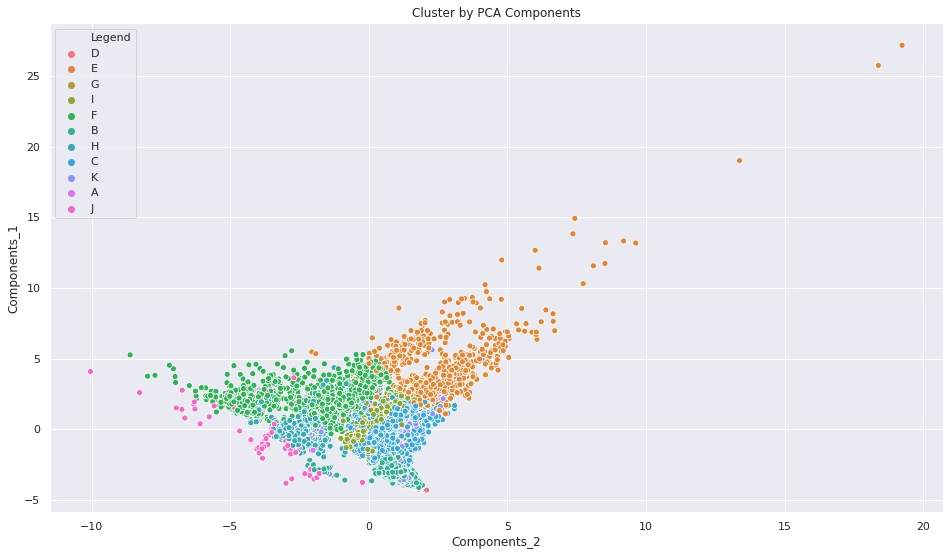

In [79]:
x_axis = kmeans_df['Components_2']
y_axis = kmeans_df['Components_1']
plt.figure(figsize = (16,9))
sns.scatterplot(x_axis,y_axis, hue = kmeans_df['Legend'])
plt.title('Cluster by PCA Components')
plt.show()